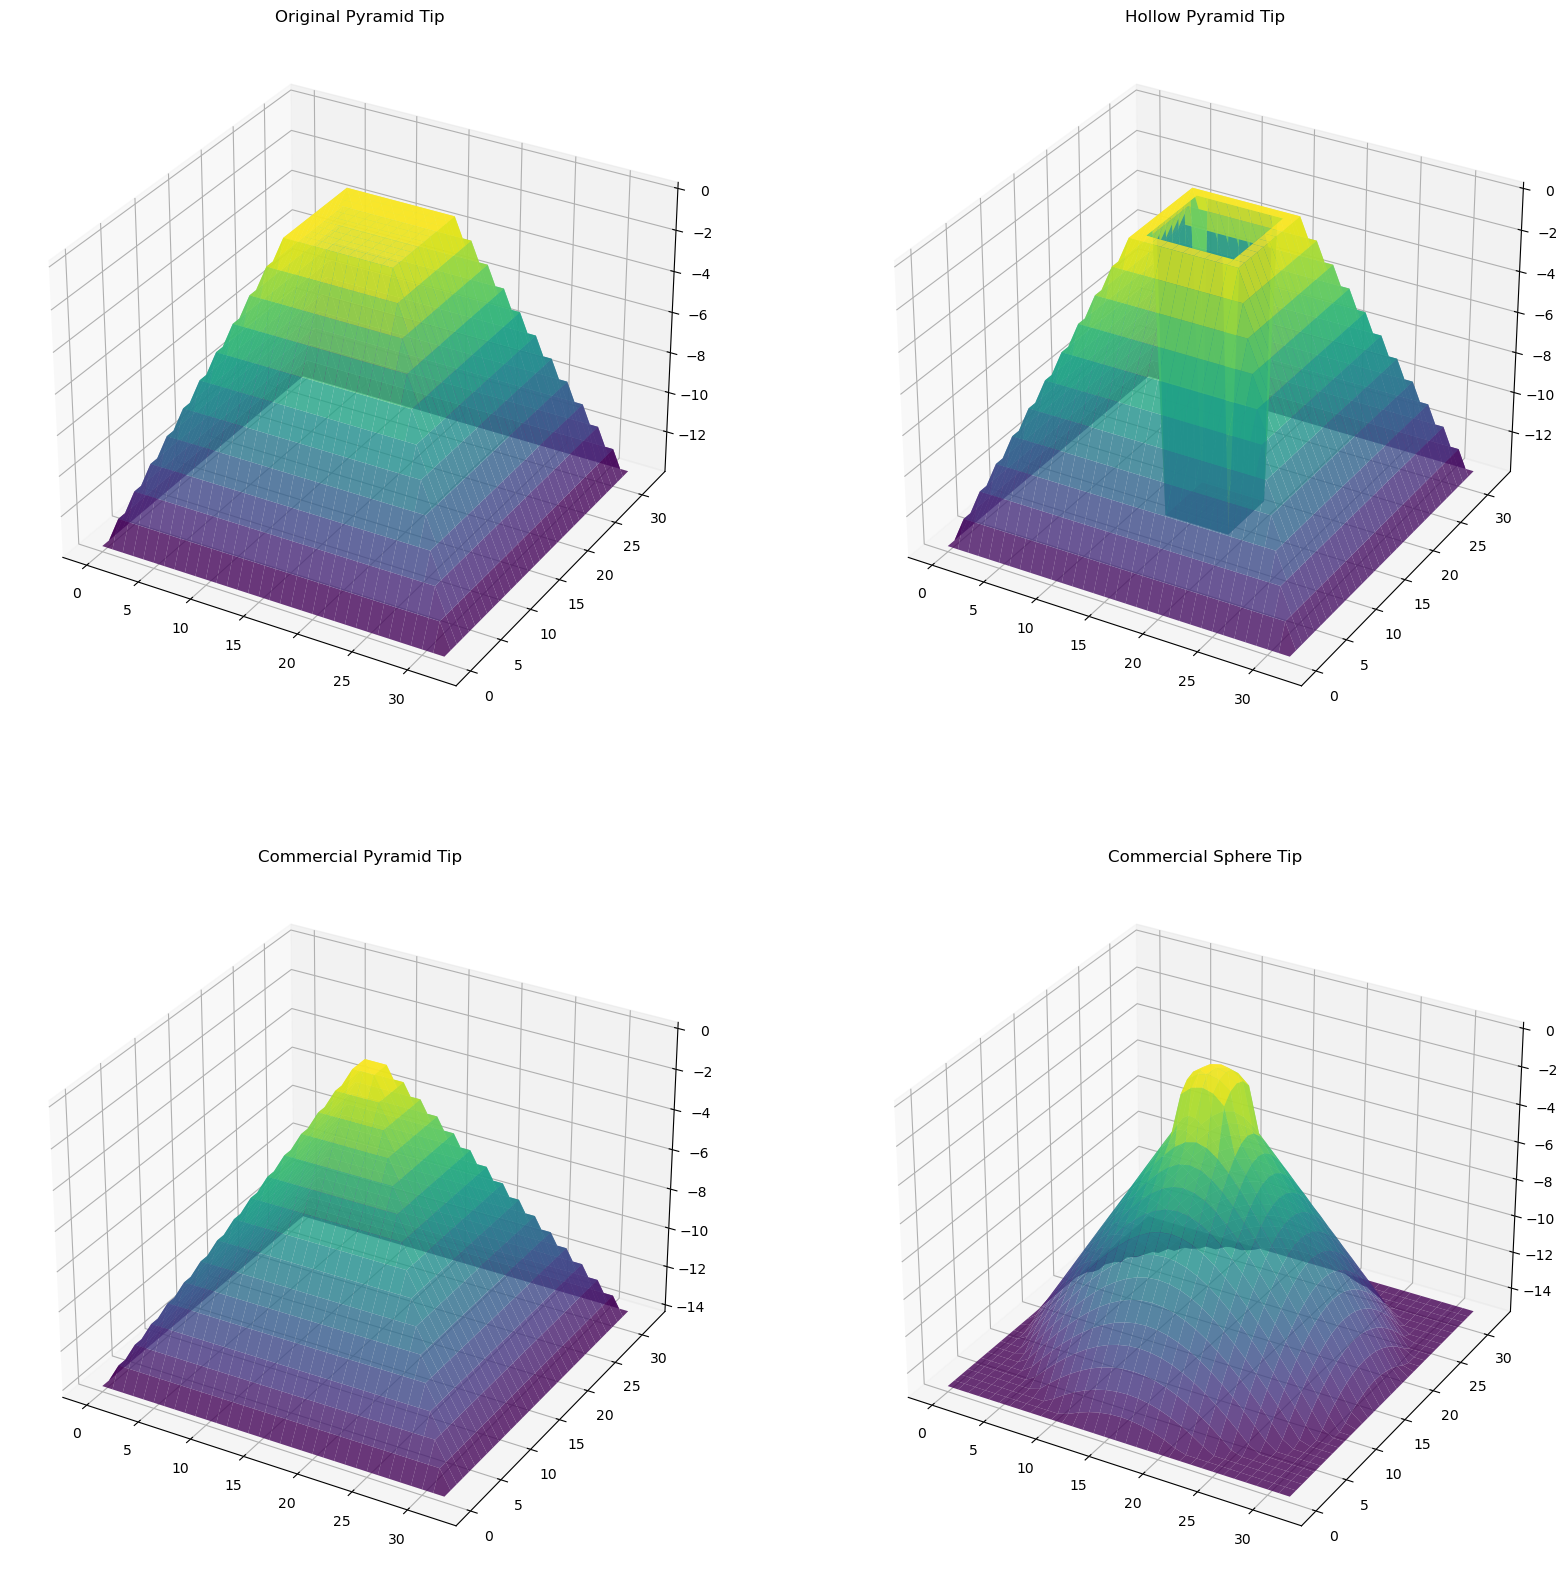

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_filled_tip(size, size_top, height):
    tip = np.zeros((size, size), dtype=float)
    x = tip.shape[0]
    y = tip.shape[1]

    for i in range(x // 2 - size_top // 2):
        for j in range(i, x - i):
            for h in range(i, x - i):
                tip[j, h] = i / (x // 2 - size_top // 2) * height
    tip = tip - np.max(tip)

    return tip

def generate_hollow_tip(size, size_top, height):
    tip = generate_filled_tip(size, size_top, height)
    for i in range(size // 2 - size_top // 2 + 1, size // 2 + size_top // 2):
        for j in range(size // 2 - size_top // 2 + 1, size // 2 + size_top // 2):
            tip[i,j] = np.min(tip)
    return tip

def generate_commercial_tip_pyramid(size, height):
    tip = np.zeros((size, size), dtype=float)
    x = tip.shape[0]
    y = tip.shape[1]

    for i in range(x // 2):
        for j in range(i, x - i):
            for h in range(i, x - i):
                tip[j, h] = i / (x // 2) * height
    tip = tip - np.max(tip)

    return tip

def generate_commercial_tip_sphere(size, sphere_radius, height):
    tip = np.zeros((size, size), dtype=float)
    x = tip.shape[0]
    y = tip.shape[1]
    
    for i in range(x // 2 - sphere_radius // 2):
        for j in range(i, x - i):
            for h in range(i, x - i):
                d = np.sqrt((j - x // 2) ** 2. + (h - x // 2) ** 2.)
                if d <= (x // 2):
                    tip[j, h] = (x // 2 - d) * (height - sphere_radius) / (x // 2 - sphere_radius)
    for i in range(x // 2 - sphere_radius // 2, x // 2 + 1):
        for j in range(i, x - i):
            for h in range(i, x - i):            
                d = np.sqrt((j - x // 2) ** 2. + (h - x // 2) ** 2.0)
                if d <= sphere_radius:
                    tip[j, h] = height - sphere_radius + np.sqrt(sphere_radius ** 2. - d ** 2.)

    tip = tip - np.max(tip)

    return tip



# Generate pyramid tip and hollow tip
pyramid_tip = generate_filled_tip(33, 9, 15)
pyramid_tip_hollow = generate_hollow_tip(33, 9, 15)
commercial_tip_pyramid = generate_commercial_tip_pyramid(33, 15)
commercial_tip_sphere = generate_commercial_tip_sphere(33, 4, 15)

# Create a meshgrid
x, y = np.meshgrid(np.arange(pyramid_tip.shape[0]), np.arange(pyramid_tip.shape[1]))

# Plot the original and hollow pyramid tips in 3D
fig = plt.figure(figsize=(20, 20))

# Original Pyramid Tip
ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(x, y, pyramid_tip, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Original Pyramid Tip')

# Hollow Pyramid Tip
ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(x, y, pyramid_tip_hollow, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Hollow Pyramid Tip')

# Commercial Pyramid Tip
ax = fig.add_subplot(223, projection='3d')
ax.plot_surface(x, y, commercial_tip_pyramid , cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Commercial Pyramid Tip')

# Commercial Sphere Tip
ax = fig.add_subplot(224, projection='3d')
ax.plot_surface(x, y, commercial_tip_sphere , cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Commercial Sphere Tip')

plt.show()

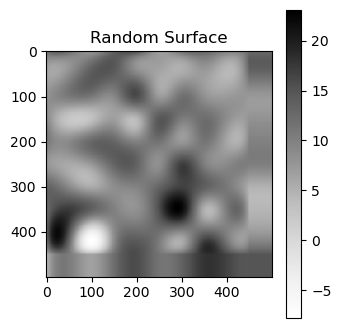

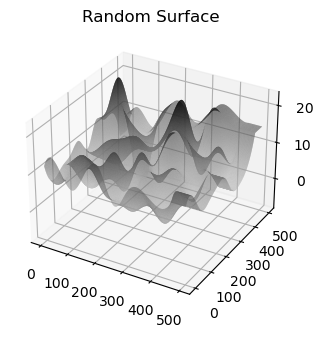

In [11]:
from scipy.interpolate import RectBivariateSpline
def generate_random_surface(size, height, std, roughness):
    
    random_height = np.random.normal(height, std, (size // roughness, size // roughness))
    x = np.arange(0, size, roughness)
    y = np.arange(0, size, roughness)

    interp_func = RectBivariateSpline(x, y, random_height)

    x_fine = np.arange(0, size, 1)
    y_fine = np.arange(0, size, 1)

    surface = interp_func(x_fine, y_fine)

    return surface

# Example: Generate a surface with periodic square features
size = 500
height = 10
std = 4
roughness = 50

random_surface = generate_random_surface(size, height, std, roughness)

# Plot the 2D array as a heatmap
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(random_surface, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Random Surface')

# Plot the surface in 3D
x, y = np.meshgrid(np.arange(size), np.arange(size))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, random_surface, cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Random Surface')

plt.show()

In [12]:
import numpy as np

def idilation(surface, tip):
    surf_xsiz, surf_ysiz = surface.shape
    tip_xsiz, tip_ysiz = tip.shape
    xc = int(tip_xsiz/2)
    yc = int(tip_ysiz/2)

    r = np.zeros_like(surface, dtype=surface.dtype)

    for i in range(surf_xsiz):
        for j in range(surf_ysiz):
            pxmin = max(-i, -xc)
            pymin = max(-j, -yc)
            pxmax = min(surf_xsiz - i, -xc + tip_xsiz -1)
            pymax = min(surf_ysiz - j, -yc + tip_ysiz -1)
            dil_max = surface[i + pxmin, j + pymin] + tip[xc + pxmin, yc + pymin]

            for px in range(pxmin, pxmax):
                for py in range(pymin, pymax):
                    temp = surface[i + px, j + py] + tip[xc + px, yc + py]
                    dil_max = max(temp, dil_max)

            r[i, j] = dil_max

    return r


Text(0.5, 1.0, 'Commercial Sphere Tip')

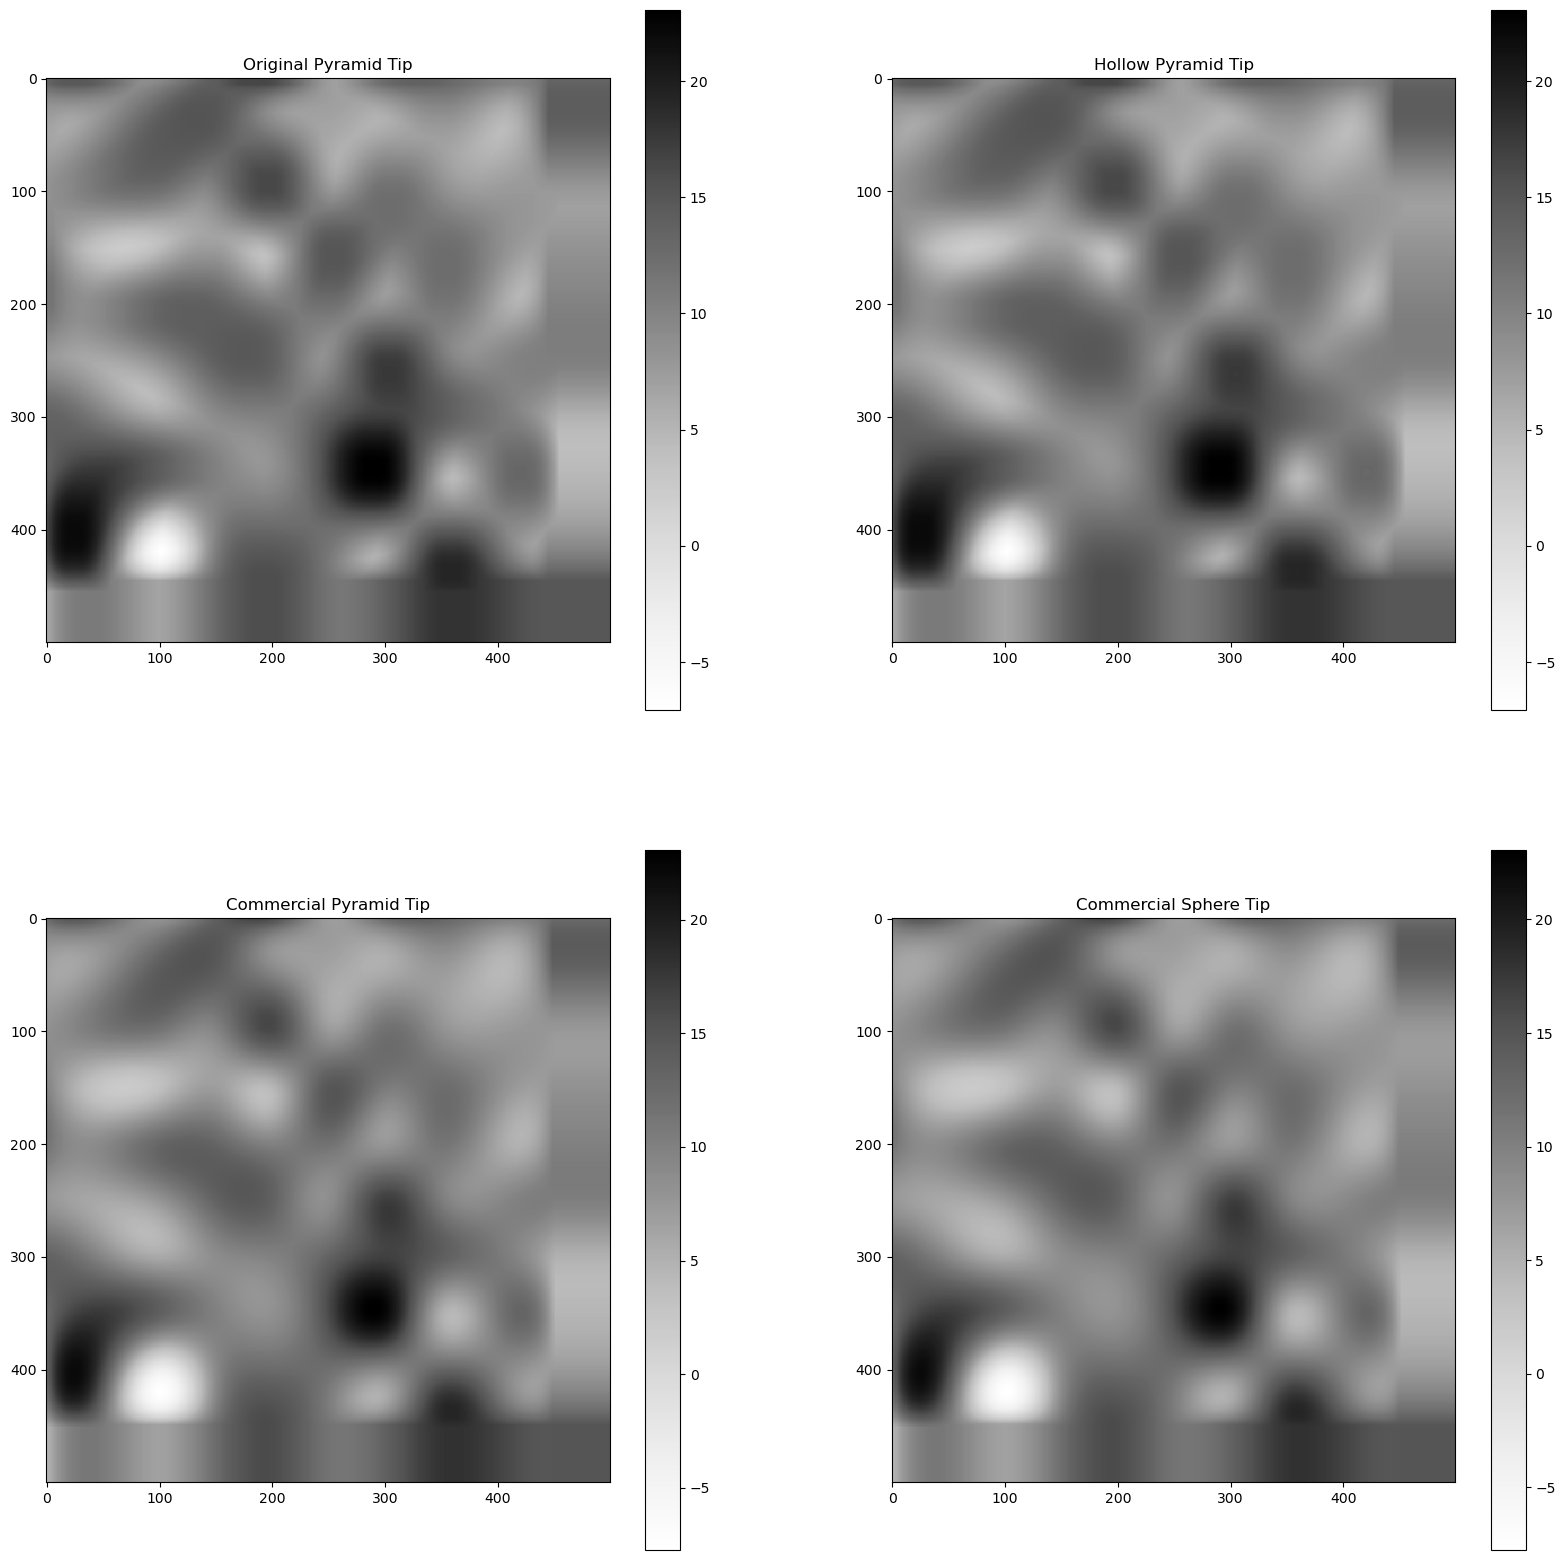

In [13]:
simulate_pyramid_tip = idilation(random_surface, pyramid_tip)
simulate_pyramid_tip_hollow = idilation(random_surface, pyramid_tip_hollow)
simulate_commercial_tip_pyramid = idilation(random_surface, commercial_tip_pyramid)
simulate_commercial_tip_sphere = idilation(random_surface, commercial_tip_sphere)

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(simulate_pyramid_tip, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Original Pyramid Tip')
plt.subplot(2, 2, 2)
plt.imshow(simulate_pyramid_tip_hollow, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Hollow Pyramid Tip')
plt.subplot(2, 2, 3)
plt.imshow(simulate_commercial_tip_pyramid, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Commercial Pyramid Tip')
plt.subplot(2, 2, 4)
plt.imshow(simulate_commercial_tip_sphere, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Commercial Sphere Tip')

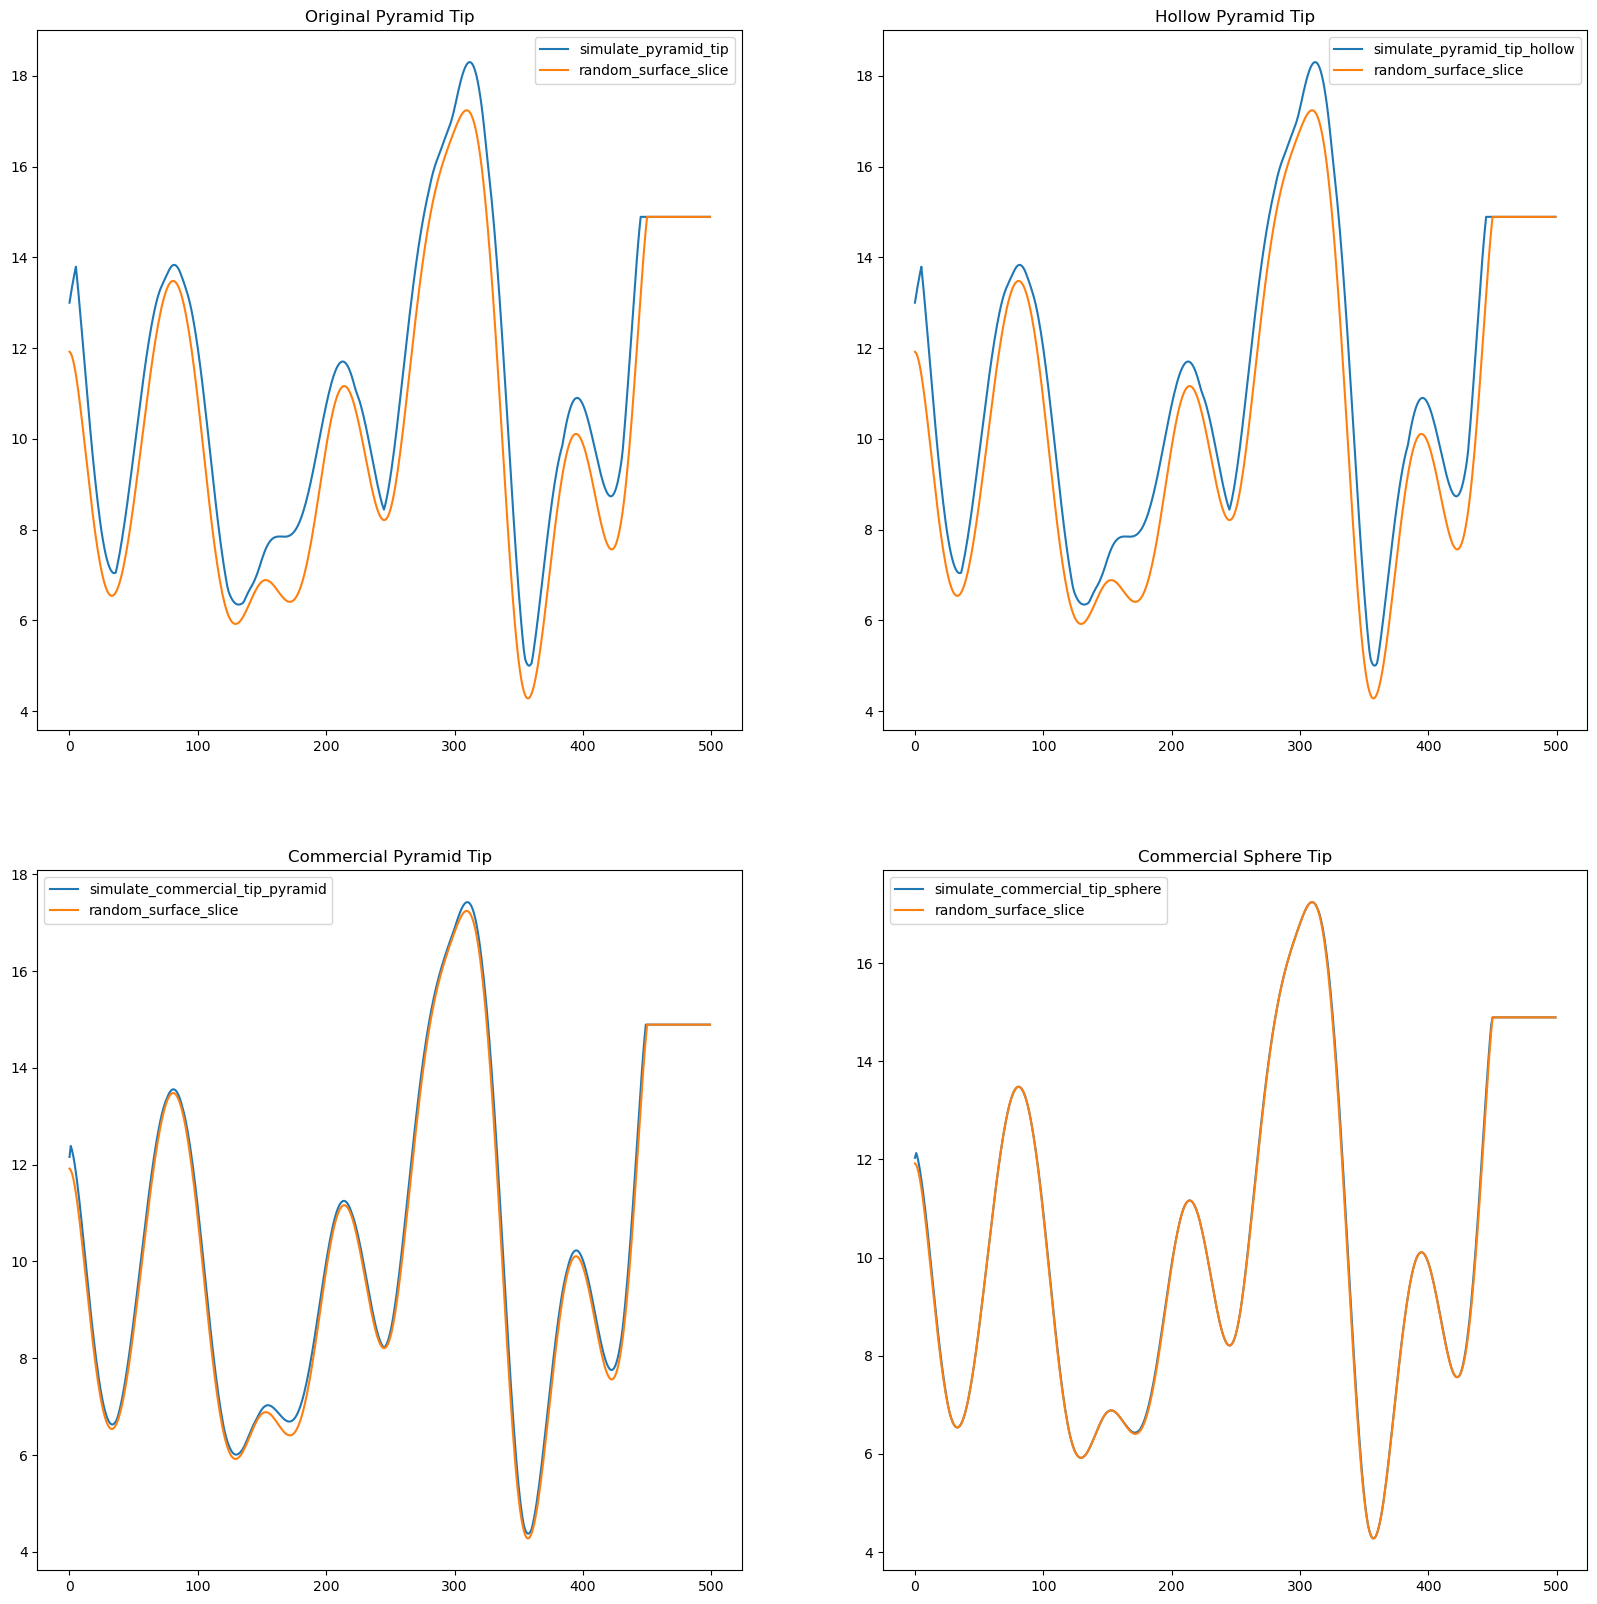

In [14]:
simulate_pyramid_tip_slice = np.diagonal(simulate_pyramid_tip)
simulate_pyramid_tip_hollow_slice = np.diagonal(simulate_pyramid_tip_hollow)
simulate_commercial_tip_pyramid_slice = np.diagonal(simulate_commercial_tip_pyramid)
simulate_commercial_tip_sphere_slice = np.diagonal(simulate_commercial_tip_sphere)
random_surface_slice = np.diagonal(random_surface)

x = range(len(random_surface_slice))

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.plot(x, simulate_pyramid_tip_slice, label='simulate_pyramid_tip')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Original Pyramid Tip')

plt.subplot(2, 2, 2)
plt.plot(x, simulate_pyramid_tip_hollow_slice, label='simulate_pyramid_tip_hollow')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Hollow Pyramid Tip')

plt.subplot(2, 2, 3)
plt.plot(x, simulate_commercial_tip_pyramid_slice, label='simulate_commercial_tip_pyramid')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Commercial Pyramid Tip')

plt.subplot(2, 2, 4)
plt.plot(x, simulate_commercial_tip_sphere_slice, label='simulate_commercial_tip_sphere')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Commercial Sphere Tip')

plt.show()

In [15]:
import numpy as np

def ierosion(image, tip):
    im_xsiz, im_ysiz = image.shape
    tip_xsiz, tip_ysiz = tip.shape
    xc = int(tip_xsiz // 2)
    yc = int(tip_ysiz // 2)
    r = np.zeros_like(image, dtype=image.dtype)

    for i in range(im_xsiz):
        for j in range(im_ysiz):
            pxmin = max(-i, -xc)
            pymin = max(-j, -yc)
            pxmax = min(im_xsiz - i, -xc + tip_xsiz - 1)
            pymax = min(im_ysiz - j, -yc + tip_ysiz - 1)
            eros_min = image[i + pxmin, j + pymin] - tip[xc + pxmin, yc + pymin]

            for px in range(pxmin, pxmax):
                for py in range(pymin, pymax):
                    temp = image[i + px, j + py] - tip[xc + px, yc + py]
                    eros_min = min(temp, eros_min)

            r[i, j] = eros_min

    return r

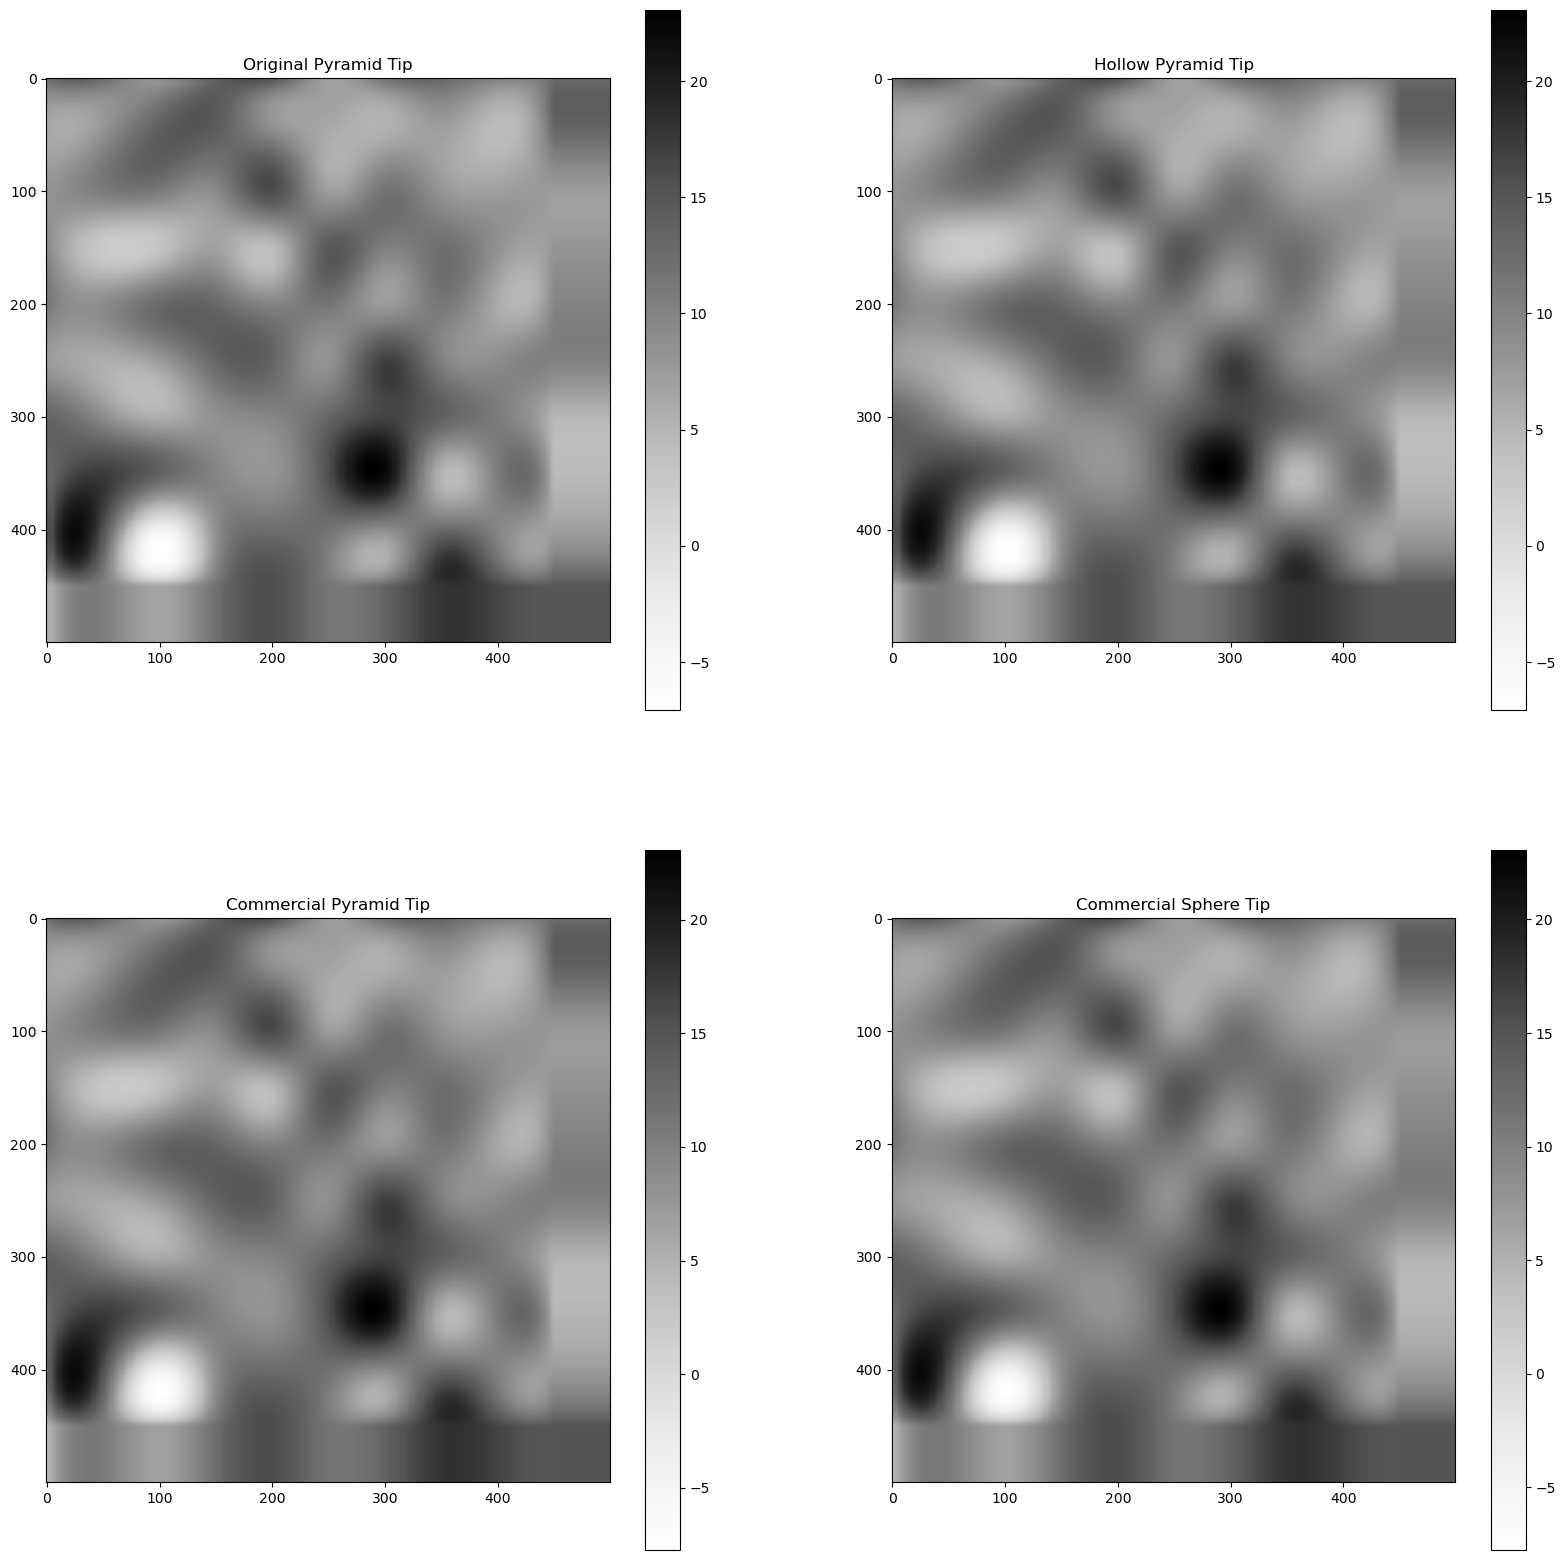

In [16]:
reconstructed_pyramid_tip = ierosion(simulate_pyramid_tip, pyramid_tip)
reconstructed_pyramid_tip_hollow = ierosion(simulate_pyramid_tip_hollow, pyramid_tip_hollow)
reconstructed_commercial_tip_pyramid = ierosion(simulate_commercial_tip_pyramid, commercial_tip_pyramid)
reconstructed_commercial_tip_sphere = ierosion(simulate_commercial_tip_sphere, commercial_tip_sphere)

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(reconstructed_pyramid_tip, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Original Pyramid Tip')
plt.subplot(2, 2, 2)
plt.imshow(reconstructed_pyramid_tip_hollow, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Hollow Pyramid Tip')
plt.subplot(2, 2, 3)
plt.imshow(reconstructed_commercial_tip_pyramid, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Commercial Pyramid Tip')
plt.subplot(2, 2, 4)
plt.imshow(reconstructed_commercial_tip_sphere, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Commercial Sphere Tip')

plt.show()


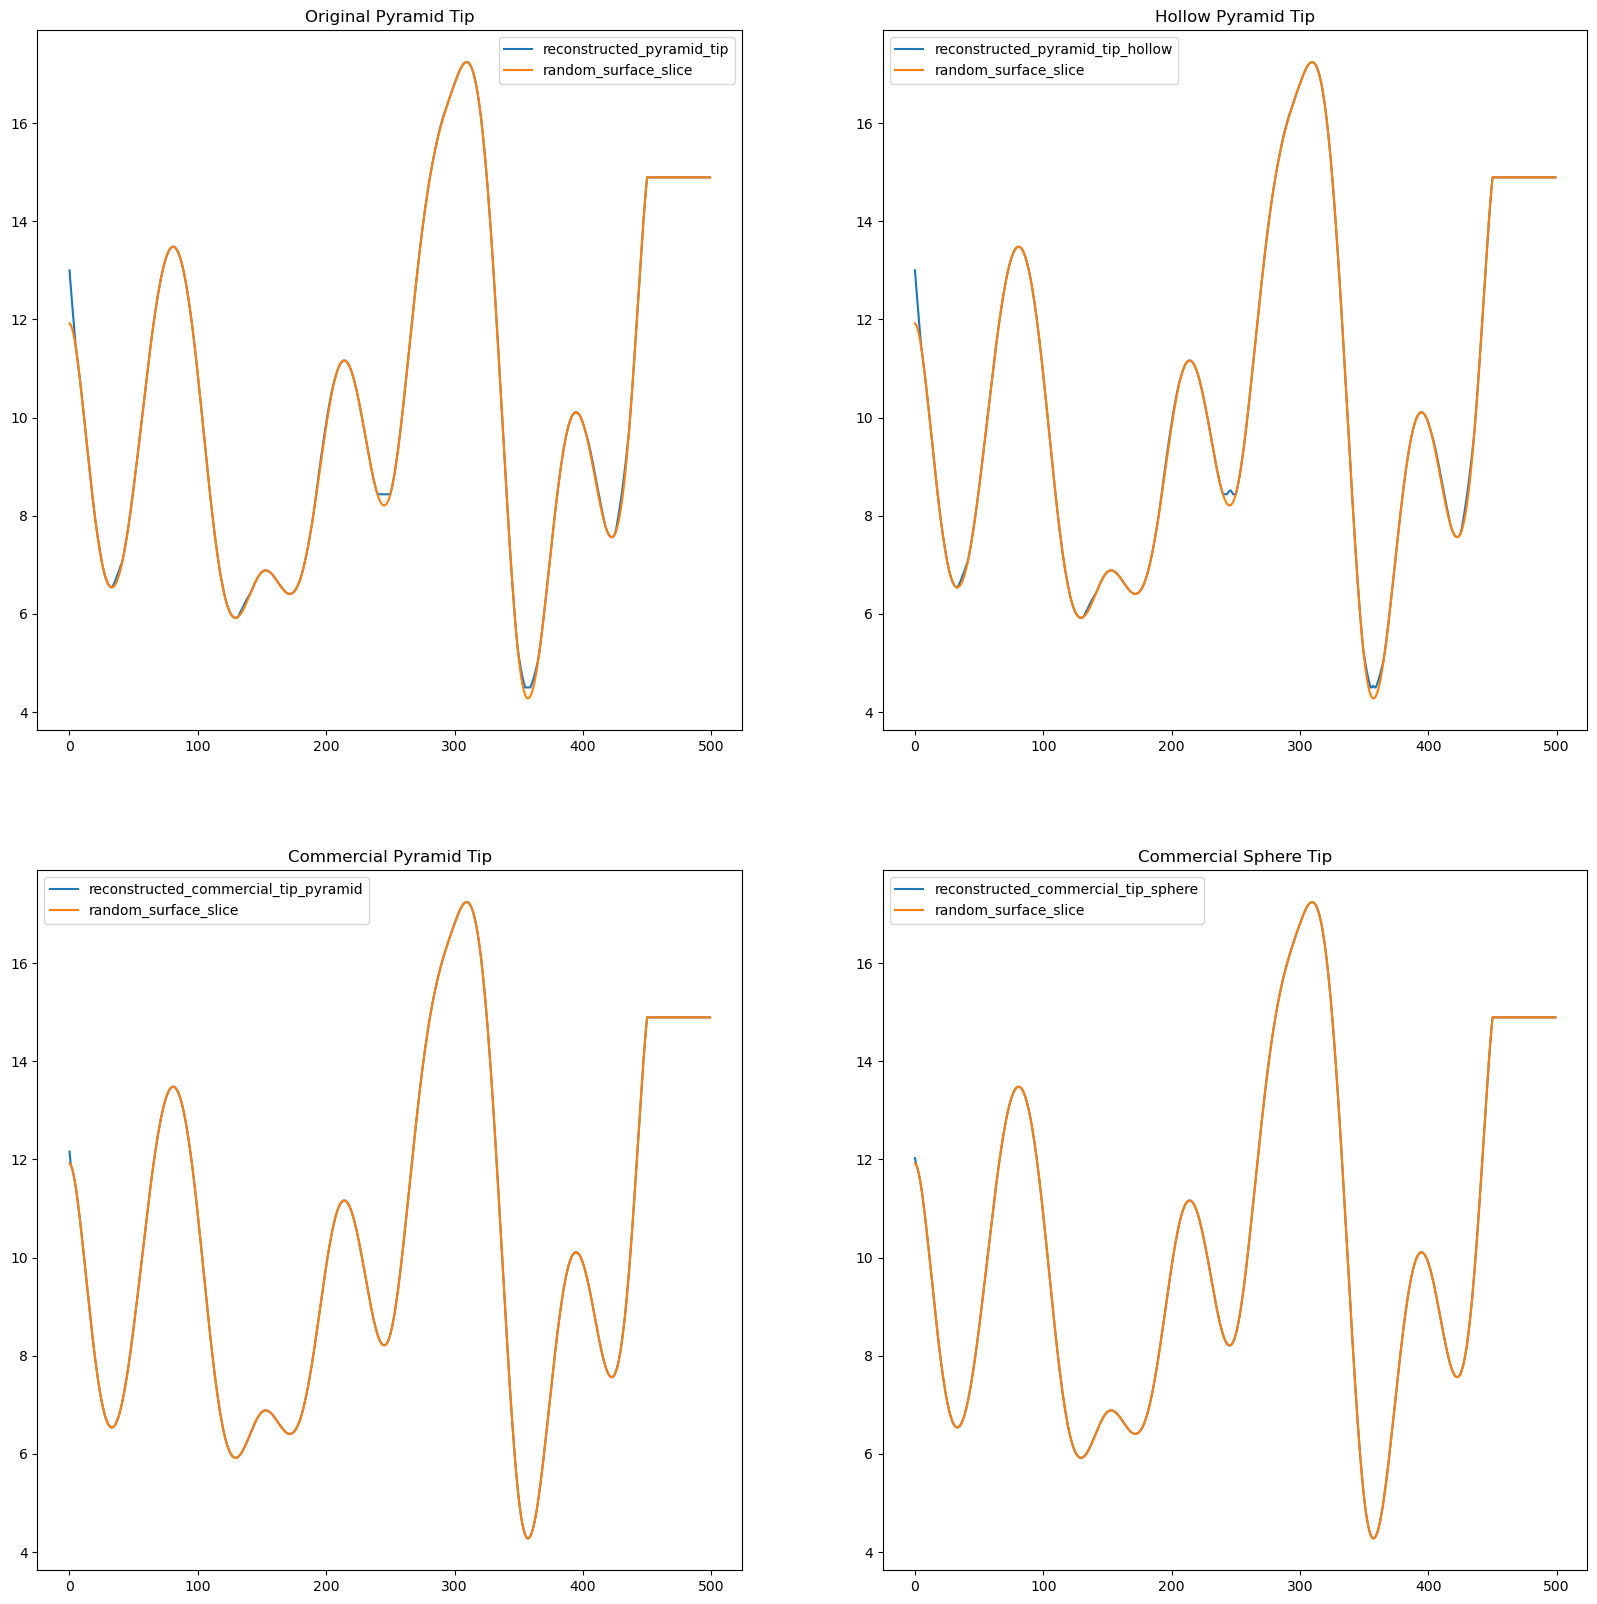

In [17]:
reconstructed_pyramid_tip_slice = np.diagonal(reconstructed_pyramid_tip)
reconstructed_pyramid_tip_hollow_slice = np.diagonal(reconstructed_pyramid_tip_hollow)
reconstructed_commercial_tip_pyramid_slice = np.diagonal(reconstructed_commercial_tip_pyramid)
reconstructed_commercial_tip_sphere_slice = np.diagonal(reconstructed_commercial_tip_sphere)
periodic_square_surface_slice = np.diagonal(random_surface)

x = range(len(periodic_square_surface_slice))

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.plot(x, reconstructed_pyramid_tip_slice, label='reconstructed_pyramid_tip')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Original Pyramid Tip')

plt.subplot(2, 2, 2)
plt.plot(x, reconstructed_pyramid_tip_hollow_slice, label='reconstructed_pyramid_tip_hollow')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Hollow Pyramid Tip')

plt.subplot(2, 2, 3)
plt.plot(x, reconstructed_commercial_tip_pyramid_slice, label='reconstructed_commercial_tip_pyramid')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Commercial Pyramid Tip')

plt.subplot(2, 2, 4)
plt.plot(x, reconstructed_commercial_tip_sphere_slice, label='reconstructed_commercial_tip_sphere')
plt.plot(x, random_surface_slice, label='random_surface_slice')
plt.legend()
plt.title('Commercial Sphere Tip')

plt.show()